Oasis Infobyte : Data Science Internship
---

Name: Amritha Prakash
---

Task 3 : CAR PRICE PREDICTION WITH MACHINE LEARNING
---

Batch: February Phase 2 OIBSIP
---

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.



In [1]:
# Importing important required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Read the Car data 

In [3]:
Car_data= pd.read_csv("CarPrice.csv")

In [4]:
#content
Car_data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
Car_data.tail(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
# Data Cleaning

In [7]:
#check for missing values
Car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# No missing values

In [11]:
# car_ID is not providing any relevant information
Car_data=Car_data.drop(['car_ID'],axis=1)

In [13]:
Car_data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
#Exploratory Data Analysis (EDA)

In [6]:
# shape
Car_data.shape

(205, 26)

In [14]:
# Information regarding the entire Dataframe, i.e. data types of each column
Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [15]:
# Describing the Dataset - i.e. overall count, mean, standard deviation, minimum, 25%, 50%, 75% and max of data values
Car_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
Car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [17]:
# Data Visualization

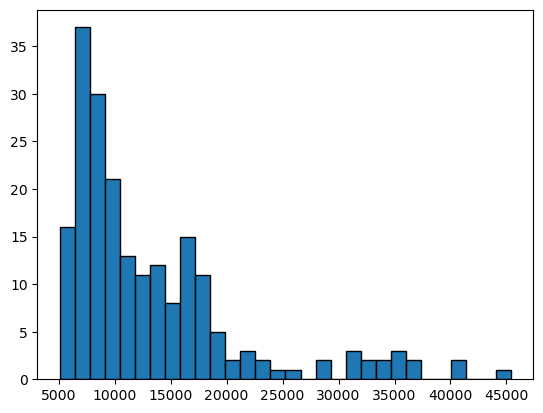

In [18]:
plt.hist(Car_data['price'], bins = 30, ec = 'black')
plt.show()

In [26]:
Car_data['price'].describe()
# Mean price for a car is around 13276 

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

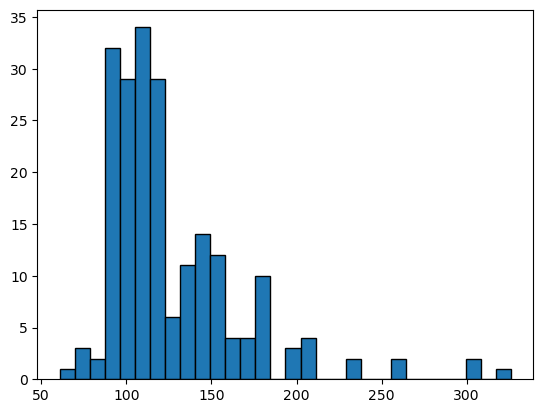

In [27]:
# Enginesize
plt.hist(Car_data['enginesize'], bins = 30, ec = 'black')
plt.show()

In [28]:
Car_data['enginesize'].describe()
# almost average cars have enginesize as 126.907317

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

In [33]:
grouped_enginesize=Car_data.groupby('enginesize')['price'].mean()

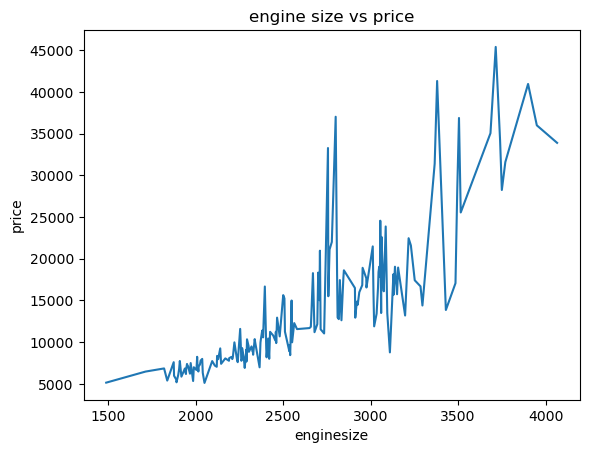

In [47]:
sns.lineplot(x=grouped_enginesize.index, y=grouped_enginesize.values)
plt.xlabel("enginesize")
plt.ylabel("price")
plt.title("engine size vs price")
plt.show()

In [42]:
# As the engine size increases, so does the price increase

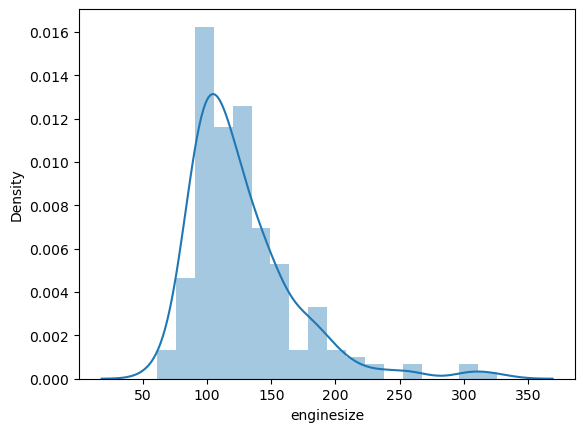

In [49]:
sns.distplot(Car_data['enginesize'])
plt.show()
# most enginesizes are int he range of 100 to 150

In [44]:
grouped_curbweight=Car_data.groupby('curbweight')['price'].mean()

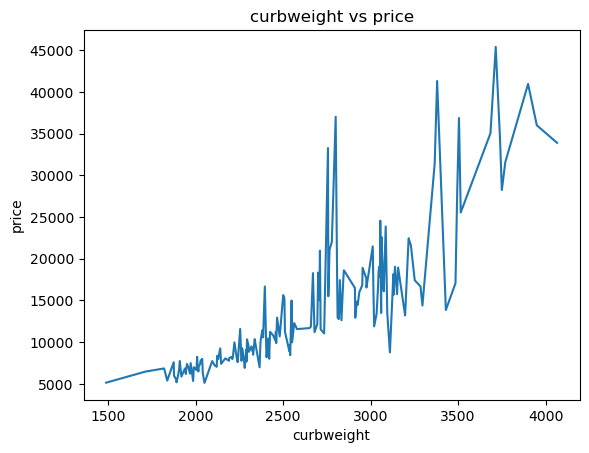

In [46]:
sns.lineplot(x=grouped_curbweight.index, y=grouped_curbweight.values)
plt.xlabel("curbweight")
plt.ylabel("price")
plt.title("curbweight vs price")
plt.show()

In [50]:
# leaving certain unusual scenarios, almost curbweight increase causes the price to increase

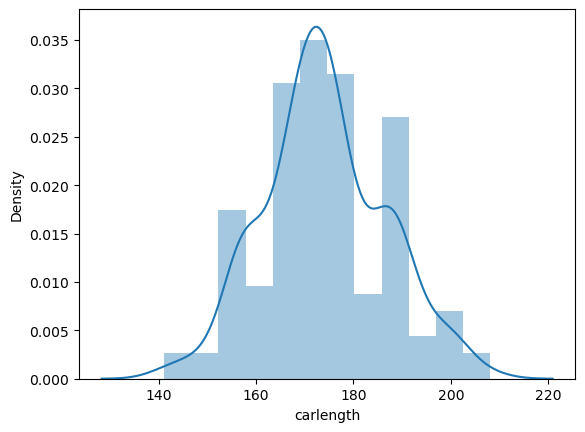

In [51]:
sns.distplot(Car_data['carlength'])
plt.show()

In [52]:
# most cars have length of 170-180

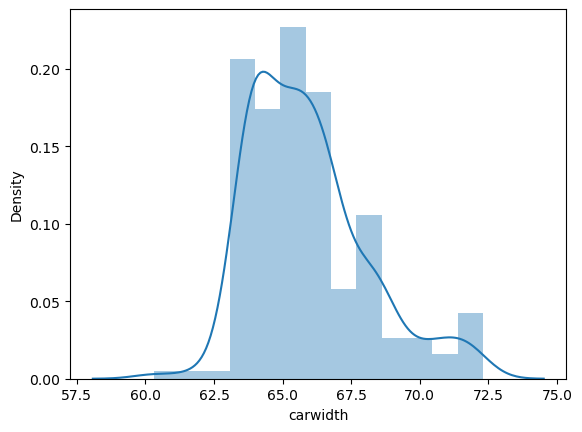

In [53]:
sns.distplot(Car_data['carwidth'])
plt.show()

In [54]:
# most cars have width in between the range 62.5-67

In [55]:
# Data Preprocessing


In [56]:
# Number of uniques values in column
print("unique values of each column")
for i in Car_data.columns[:]:
  print("*"*70)
  print("Count of unique Values in ",i,":",Car_data[i].nunique())
  print("unique values:")
  print(Car_data[i].unique())

unique values of each column
**********************************************************************
Count of unique Values in  symboling : 6
unique values:
[ 3  1  2  0 -1 -2]
**********************************************************************
Count of unique Values in  CarName : 147
unique values:
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jag

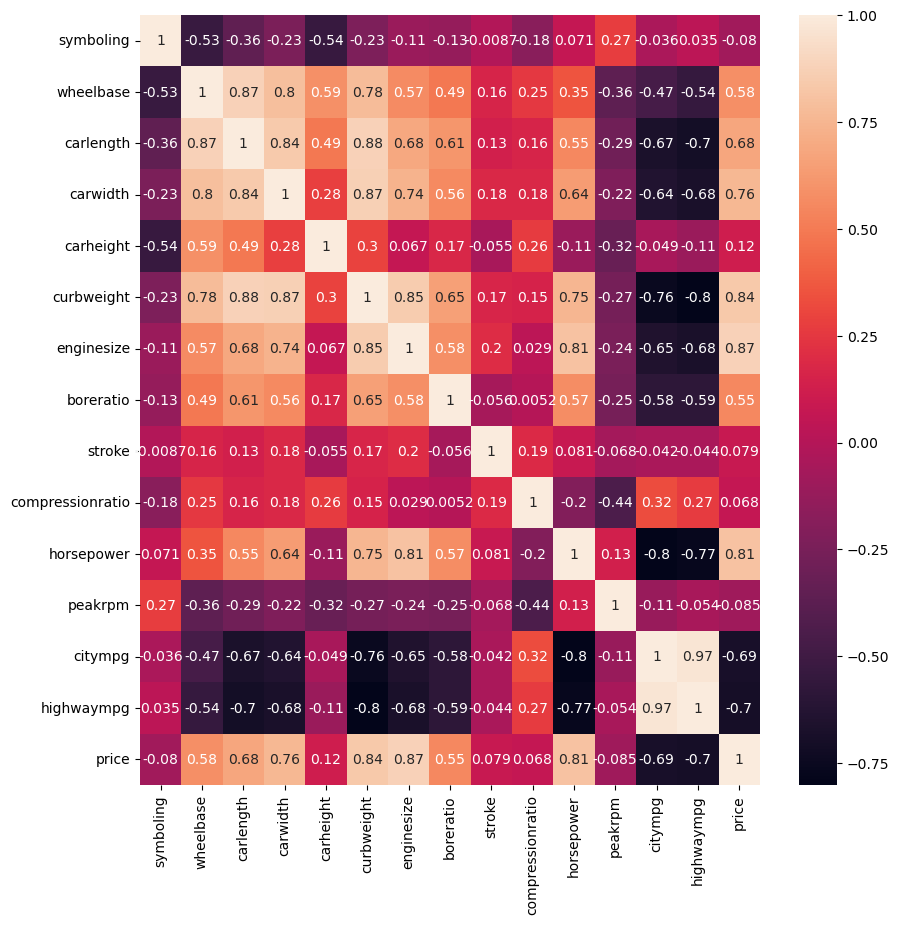

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(Car_data.corr(), annot=True)
plt.show()

In [24]:
# There are a few features that are related to price. They are ENGINESIZE, CURBWEIGHT, and HORSEPOWER
# Further, there are some other features that are inter- related like citympg and highwaympg

In [58]:
# Split the data for Test and Train

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#X = Car_data.drop(['price', 'CarName', 'fueltype', 'aspiration',
#       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
#       'cylindernumber', 'fuelsystem'], axis = 1)

# Dropping a few features as they dont have much significance in finding the prixe
X=Car_data[['enginesize']]
X

,enginesize
0,130
1,130
2,152
3,109
4,136
...,...
200,141
201,141
202,173
203,145


In [104]:
y=Car_data['price']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.2)

In [106]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [107]:
model.intercept_

-7464.835810316064

In [108]:
model.coef_

array([165.02657099])

In [109]:
line=X*model.coef_+model.intercept_


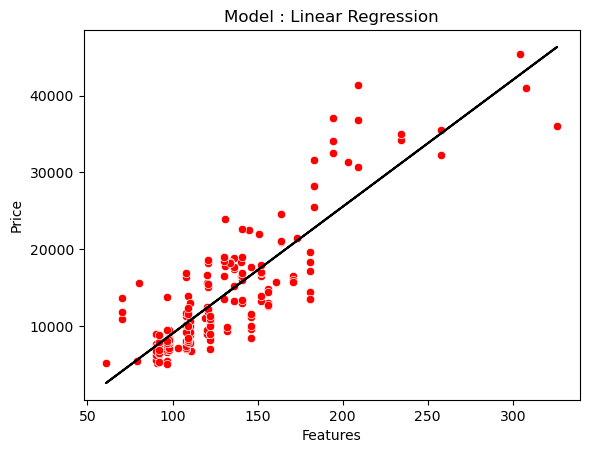

In [110]:
#For Enginesize
sns.scatterplot(x='enginesize',y='price', data=Car_data, color='red')
plt.plot(X, line,c="black",label="Regression line")

plt.xlabel("Enginesize")
plt.ylabel("Price")
plt.title("Model : Linear Regression")
plt.show()

In [111]:
X=Car_data[['horsepower']]
X

,horsepower
0,111
1,111
2,154
3,102
4,115
...,...
200,114
201,160
202,134
203,106


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.2)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
line=X*model.coef_+model.intercept_


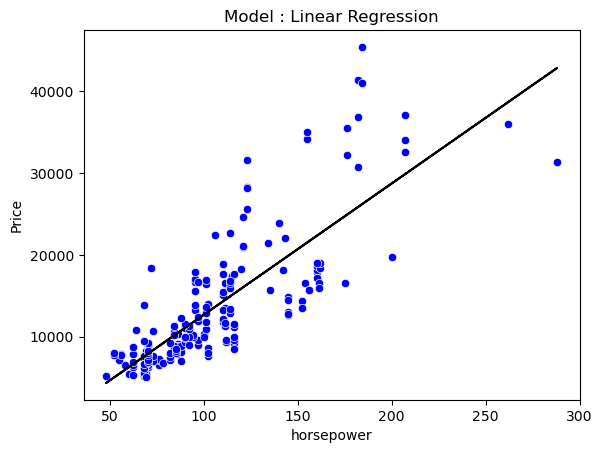

In [113]:
#For horsepower
sns.scatterplot(x='horsepower',y='price', data=Car_data, color='blue')
plt.plot(X, line,c="black",label="Regression line")

plt.xlabel("horsepower")
plt.ylabel("Price")
plt.title("Model : Linear Regression")
plt.show()

In [115]:
# considering almost all features which are most related to predicting the target - i.e. price
features = Car_data.drop(['price', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'], axis = 1)
features

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [116]:
x_train, x_test, y_train, y_test = train_test_split(features, y, random_state = 20, test_size = 0.2)

In [117]:
model = LinearRegression()
model.fit(x_train, y_train)
model.intercept_


-66330.10407222359

In [118]:
model.coef_

array([ 1.90738313e+02,  1.72031400e+02, -1.34921764e+02,  6.37822018e+02,
        2.56512831e+02,  2.10812252e+00,  1.17097814e+02, -4.68099913e+02,
       -3.03934105e+03,  2.89711657e+02,  3.95257173e+01,  2.78517434e+00,
       -4.06497517e+02,  3.38530172e+02])

In [120]:
pd.DataFrame(data = model.coef_, index = x_train.columns, columns = ['coefficients'])

,coefficients
symboling,190.738313
wheelbase,172.031400
carlength,-134.921764
carwidth,637.822018
carheight,256.512831
curbweight,2.108123
enginesize,117.097814
boreratio,-468.099913
stroke,-3039.341051
compressionratio,289.711657


In [121]:
# Trainign
model.score(x_train, y_train)

0.8585062932525362

In [122]:
#Testing
model.score(x_test, y_test)

0.7302378286413921

In [128]:
y_pred=model.predict(x_test)


In [130]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
5,15250.0,15458.914560
44,8916.5,6304.042905
155,8778.0,7939.186818
129,31400.5,38584.994886
152,6488.0,6530.902327
192,13845.0,9819.822166
53,6695.0,5445.006330
149,11694.0,9651.863589
111,15580.0,17987.590118
135,15510.0,14330.713417


In [131]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sm.add_constant(x_train)

,const,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
91,1.0,1,94.5,165.3,63.8,54.5,1918,97,3.15,3.29,9.4,69,5200,31,37
153,1.0,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,62,4800,31,37
171,1.0,2,98.4,176.2,65.6,52.0,2714,146,3.62,3.50,9.3,116,4800,24,30
77,1.0,2,93.7,157.3,64.4,50.8,1944,92,2.97,3.23,9.4,68,5500,31,38
113,1.0,0,114.2,198.9,68.4,56.7,3285,120,3.46,2.19,8.4,95,5000,19,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1.0,0,96.9,173.6,65.4,54.9,2420,108,3.62,2.64,9.0,82,4800,23,29
137,1.0,2,99.1,186.6,66.5,56.1,2847,121,3.54,3.07,9.0,160,5500,19,26
156,1.0,0,95.7,166.3,64.4,53.0,2081,98,3.19,3.03,9.0,70,4800,30,37
15,1.0,0,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182,5400,16,22


In [132]:
# Ordinary least Square
results=sm.OLS(y_train, sm.add_constant(x_train)).fit()
results.params

const              -66330.104072
symboling             190.738313
wheelbase             172.031400
carlength            -134.921764
carwidth              637.822018
carheight             256.512831
curbweight              2.108123
enginesize            117.097814
boreratio            -468.099913
stroke              -3039.341051
compressionratio      289.711657
horsepower             39.525717
peakrpm                 2.785174
citympg              -406.497517
highwaympg            338.530172
dtype: float64

In [134]:
data=pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})
data

,coef,p-value
const,-66330.104072,0.001
symboling,190.738313,0.482
wheelbase,172.031400,0.176
carlength,-134.921764,0.051
carwidth,637.822018,0.030
carheight,256.512831,0.129
curbweight,2.108123,0.356
enginesize,117.097814,0.000
boreratio,-468.099913,0.731
stroke,-3039.341051,0.001


In [137]:
X = features
y = Car_data['price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     78.05
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           7.97e-71
Time:                        00:01:36   Log-Likelihood:                -1936.7
No. Observations:                 205   AIC:                             3903.
Df Residuals:                     190   BIC:                             3953.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.165e+04   1.57e+04  